<a href="https://colab.research.google.com/github/Asal-Sanei/MachineLearning2025/blob/main/ExtraScoreTasks/ExtraScore_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Data

In [72]:
!gdown 1cu8uJaXv5TH0-6Mi274MKwb65A6eauo9
#https://drive.google.com/file/d/1cu8uJaXv5TH0-6Mi274MKwb65A6eauo9/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1cu8uJaXv5TH0-6Mi274MKwb65A6eauo9
To: /content/golf_df.csv
100% 430/430 [00:00<00:00, 1.50MB/s]


In [73]:
data=pd.read_csv('/content/golf_df.csv')
data

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [74]:
data.columns=['outlook','temprature','humidity','wind','play']
data

,outlook,temprature,humidity,wind,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


#Entropy

In [75]:
labels=data['play']
len(labels)
labels.unique()
labels.value_counts()
p=labels.value_counts()/len(labels)
p

,count
play,
yes,0.642857
no,0.357143


In [76]:
-sum(p*np.log2(p))

0.9402859586706311

##Function

In [77]:
def entropy(labels):
  p=labels.value_counts()/len(labels)
  return -sum(p*np.log2(p))

In [78]:
entropy(data['play'])

0.9402859586706311

#Information Gain

In [79]:
#Entropy parent
target='play'
entropy_parent=entropy(data[target])
entropy_parent

0.9402859586706311

In [80]:
def information_gain(data, feature, target):
  entropy_parent = entropy(data[target])
  entropy_child = 0  # Initialize entropy_child within the function's scope
  for value in data[feature].unique():
    subset = data[data[feature] == value]
    wi = len(subset) / len(data)
    entropy_child += wi * entropy(subset[target])
  return entropy_parent - entropy_child

In [81]:
information_gain(data,'outlook','play')

0.24674981977443933

In [82]:
information_gain(data,'temprature','play')

0.02922256565895487

In [83]:
information_gain(data,'wind','play')

0.04812703040826949

In [84]:
information_gain(data,'humidity','play')

0.15183550136234159

In [85]:
[information_gain(data,feature,'play')for feature in data.iloc[:,:-1].columns]

[0.24674981977443933,
 0.02922256565895487,
 0.15183550136234159,
 0.04812703040826949]

In [86]:
np.argmax([information_gain(data,feature,'play')for feature in data.iloc[:,:-1].columns])

np.int64(0)

#Adding Nodes

In [87]:
class Node:
  def __init__(self,feature=None,label=None):
    self.feature=feature
    self.label=label
    self.children={}
  def __repr__(self):
    if self.feature is not None:
      return f'DecisionNode(feature="{self.feature}",children={self.children})'
    else:
      return f'LeafNode(label="{self.label}")'




#Decision Tree


In [88]:
def make_tree(data,target):
  #leaf node
  if len(data[target].unique())==1:
    return Node(label=data[target].iloc[0])

  features=data.drop(target,axis=1).columns
  if len(features)==0 or len(data)==0:
    return Node(label=data[target].mode()[0])
  print(features)
  gains=[information_gain(data,feature,target) for feature in features]
  print(gains)
  #greedy search
  max_gain_idx=np.argmax(gains)
  print(max_gain_idx)
  best_features=features[max_gain_idx]
  print(best_features)
  #make a node
  node=Node(feature=best_features)
  # **Call the unique() method to get unique values of best_features**
  for value in data[best_features].unique():
    print(value)
    #subset
    subset=data[data[best_features]==value].drop(best_features,axis=1)
    node.children[value]=make_tree(subset,target)

  return(node)

In [89]:
tree=make_tree(data,'play')

Index(['outlook', 'temprature', 'humidity', 'wind'], dtype='object')
[0.24674981977443933, 0.02922256565895487, 0.15183550136234159, 0.04812703040826949]
0
outlook
sunny
Index(['temprature', 'humidity', 'wind'], dtype='object')
[0.5709505944546686, 0.9709505944546686, 0.01997309402197489]
1
humidity
high
normal
overcast
rainy
Index(['temprature', 'humidity', 'wind'], dtype='object')
[0.01997309402197489, 0.01997309402197489, 0.9709505944546686]
2
wind
False
True


#Iris Data

In [90]:
iris=load_iris()
X,y=iris.data,iris.target

#scikit learn functions

In [91]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn import tree


##train test set

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
X_train.shape,X_test.shape

((112, 4), (38, 4))

In [93]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

#Visualization

[Text(0.4, 0.9, 'x[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[2] <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'x[0] <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

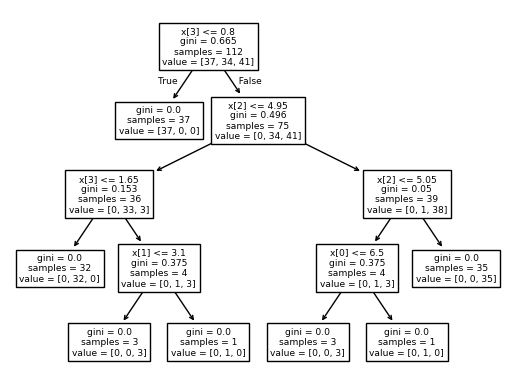

In [94]:
tree.plot_tree(clf)

#Depth control_Criterian

In [95]:
clf = DecisionTreeClassifier(max_depth=3,random_state=42,ccp_alpha=0.1,criterion='entropy')

clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.1, criterion='entropy', max_depth=3,
                       random_state=42)

[Text(0.4, 0.875, 'x[2] <= 2.35\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[2] <= 4.95\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[3] <= 1.65\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.6, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.8, 0.375, 'entropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]')]

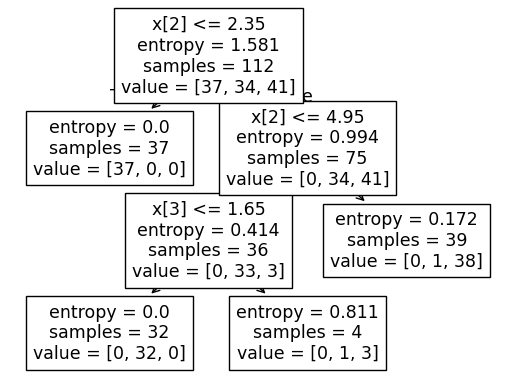

In [96]:
tree.plot_tree(clf)